<a href="https://colab.research.google.com/github/min-program/Deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid,y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


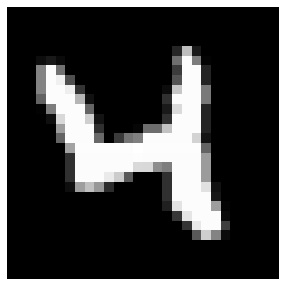

In [3]:
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis("off")
  plt.show()

plot_image(x_train, 20)





In [4]:
print(x_train.min(), x_train.max())
print(x_train.min(), x_valid.max())

0 255
0 255


In [5]:
#x_train=x_train/255.0
#x_valid=x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [6]:
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
with tf.device('/device:GPU:0'):
 model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    #Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
]
)

In [8]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#모델 훈련
history=model.fit(x_train_in, y_train,
                  validation_data=(x_valid_in, y_valid),
                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.5844 - accuracy: 0.9376 - val_loss: 0.1073 - val_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0993 - val_accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0700 - accuracy: 0.9788 - val_loss: 0.1071 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.1086 - val_accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.1252 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.1346 - val_accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.1385 - val_accuracy

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.2070 - accuracy: 0.9739


[0.20700319111347198, 0.9739000201225281]

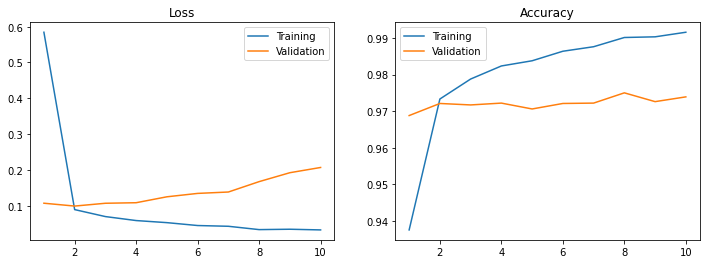

In [10]:
def plot_loss_acc(history, epoch):
  
  loss, val_loss=history.history['loss'],history.history['val_loss']
  acc, val_acc=history.history['accuracy'],history.history['val_accuracy']

  fig, axes=plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()


plot_loss_acc(history, 10)



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
model.layers

In [15]:
model.layers[0]

In [16]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.86820030e-01, -2.13106349e-02, -6.46186918e-02,
           -2.90228669e-02, -7.62033612e-02, -1.61159366e-01,
           -1.63028449e-01, -1.94323659e-01,  5.86176030e-02,
           -1.92630798e-01, -1.54216178e-02, -1.06618265e-02,
           -8.60002488e-02,  2.25558132e-03, -1.16948895e-01,
           -2.82574117e-01, -6.14541247e-02, -1.83658585e-01,
           -1.11302845e-02,  1.13551822e-02,  2.50172559e-02,
           -2.38237809e-02, -1.59737989e-01, -1.16507672e-01,
           -1.14642330e-01, -1.49103850e-01, -1.19732565e-03,
           -1.13267049e-01, -1.38475910e-01, -9.50219110e-03,
           -1.04867481e-02, -1.44027516e-01]],
 
         [[ 9.50830802e-02,  4.44488879e-03, -7.75347054e-02,
           -1.10803742e-03, -1.97694555e-01,  1.94572434e-02,
           -5.42142056e-02, -4.09113348e-01, -2.05177367e-01,
            4.43457849e-02,  6.11737254e-04, -6.22352585e-02,
           

In [19]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.86820030e-01, -2.13106349e-02, -6.46186918e-02,
          -2.90228669e-02, -7.62033612e-02, -1.61159366e-01,
          -1.63028449e-01, -1.94323659e-01,  5.86176030e-02,
          -1.92630798e-01, -1.54216178e-02, -1.06618265e-02,
          -8.60002488e-02,  2.25558132e-03, -1.16948895e-01,
          -2.82574117e-01, -6.14541247e-02, -1.83658585e-01,
          -1.11302845e-02,  1.13551822e-02,  2.50172559e-02,
          -2.38237809e-02, -1.59737989e-01, -1.16507672e-01,
          -1.14642330e-01, -1.49103850e-01, -1.19732565e-03,
          -1.13267049e-01, -1.38475910e-01, -9.50219110e-03,
          -1.04867481e-02, -1.44027516e-01]],

        [[ 9.50830802e-02,  4.44488879e-03, -7.75347054e-02,
          -1.10803742e-03, -1.97694555e-01,  1.94572434e-02,
          -5.42142056e-02, -4.09113348e-01, -2.05177367e-01,
           4.43457849e-02,  6.11737254e-04, -6.22352585e-02,
          -8.56533125e-02, -

In [20]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.41500384, -0.26077944, -0.3218062 , -0.13377567, -0.11497748,
       -0.16219397, -0.04880478, -0.19364202,  0.00340584, -0.321797  ,
       -0.38599372, -0.00469204, -0.00468628, -0.04974633, -0.00142128,
       -0.07592194, -0.27866787, -0.06751982, -0.00732915, -0.51028526,
       -0.06758638, -0.26339865, -0.28461024, -0.01331936, -0.01031275,
       -0.35483098, -0.01304222, -0.16649932, -0.02255815, -0.35699826,
       -0.03129569, -0.04802134], dtype=float32)>

In [21]:
model.get_layer('conv')

In [22]:
activator=tf.keras.Model(inputs=model.input,
                         outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 74ms/step


2

In [23]:
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

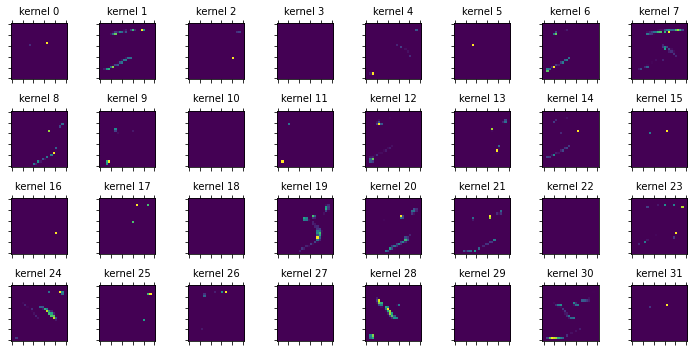

In [24]:
fig, axes= plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8,i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


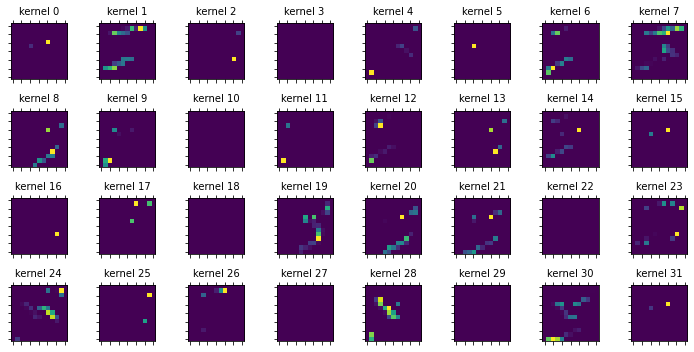

In [30]:
fig, axes= plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)


plt.tight_layout()
plt.show()